<a href="https://www.kaggle.com/code/pratikdhembare/eda-on-team-india-s-performance?scriptVersionId=115704147" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/icc-mens-t20-world-cup/bowling_card.csv
/kaggle/input/icc-mens-t20-world-cup/batting_card.csv
/kaggle/input/icc-mens-t20-world-cup/details.csv
/kaggle/input/icc-mens-t20-world-cup/summary.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
warnings.filterwarnings("ignore")

**Importing all files of Dataset**

In [4]:
batting=pd.read_csv('/kaggle/input/icc-mens-t20-world-cup/bowling_card.csv')
batting.sample(5)

,season,match_id,match_name,home_team,away_team,bowling_team,venue,city,country,innings_id,...,conceded,wickets,economyRate,dots,foursConceded,sixesConceded,wides,noballs,captain,href
285,2022,1298153,AUS v SL,SL,AUS,SL,Perth Stadium,Perth,Australia,2,...,53,0,17.66,0,3,5,0,0,False,https://www.espncricinfo.com/ci/content/player...
17,2022,1298178,ENG v INDIA,INDIA,ENG,ENG,Adelaide Oval,Adelaide,Australia,1,...,43,3,10.75,8,3,3,1,0,False,https://www.espncricinfo.com/ci/content/player...
379,2022,1298144,NAM v UAE,UAE,NAM,NAM,"Simonds Stadium, South Geelong, Victoria",Geelong,Australia,1,...,30,0,10.00,3,2,1,1,0,False,https://www.espncricinfo.com/ci/content/player...
366,2022,1298145,IRE v WI,WI,IRE,IRE,"Bellerive Oval, Hobart",Hobart,Australia,1,...,33,1,8.25,9,3,1,1,0,False,https://www.espncricinfo.com/ci/content/player...
69,2022,1298174,NED v SA,NED,SA,NED,Adelaide Oval,Adelaide,Australia,2,...,9,3,4.50,5,0,0,1,0,False,https://www.espncricinfo.com/ci/content/player...


In [5]:
bowling=pd.read_csv('/kaggle/input/icc-mens-t20-world-cup/batting_card.csv')
bowling.sample(5)

,season,match_id,match_name,home_team,away_team,venue,city,country,current_innings,innings_id,...,fours,sixes,strikeRate,captain,isNotOut,runningScore,runningOver,shortText,commentary,link
525,2022,1298144,NAM v UAE,UAE,NAM,"Simonds Stadium, South Geelong, Victoria",Geelong,Australia,UAE,1,...,0,0,100.00,False,False,"{'wickets': 3, 'runs': 113}",16.6,c &dagger;Green b Wiese,"short ball on middle, Sharafu tries to ride th...",NaN
462,2022,1298149,IRE v SL,IRE,SL,"Bellerive Oval, Hobart",Hobart,Australia,SL,2,...,2,0,140.90,False,True,{},NaN,not out,NaN,NaN
625,2022,1298138,IRE v ZIM,ZIM,IRE,"Bellerive Oval, Hobart",Hobart,Australia,ZIM,1,...,1,0,75.00,True,False,"{'wickets': 3, 'runs': 37}",5.3,st &dagger;Tucker b Simi Singh,"<b>skips down, swings at thin air, and Tucker ...",NaN
204,2022,1298167,ENG v NZ,ENG,NZ,"Brisbane Cricket Ground, Woolloongabba, Brisbane",Brisbane,Australia,ENG,1,...,0,1,200.00,False,True,{},NaN,not out,NaN,NaN
652,2022,1298137,SCOT v WI,SCOT,WI,"Bellerive Oval, Hobart",Hobart,Australia,WI,2,...,3,0,113.33,False,False,"{'wickets': 3, 'runs': 58}",7.4,b Watt,<B>top of off!</b> Just what Scotland needed f...,NaN


In [6]:
details=pd.read_csv('/kaggle/input/icc-mens-t20-world-cup/details.csv')
# details.set_index('match_id',inplace=True)
details.sample(5)

,comment_id,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,runs,...,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText
4429,210030,1298161,NZ v SL,NZ,SL,SL,2,11,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"pushed through a little quicker, pushed to cov...",NaN,NaN
9608,15050,1298135,NAM v SL,NAM,SL,NAM,1,6,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"Similar length ball around middle stump, Baard...",NaN,NaN
3211,22050,1298166,AFG v SL,AFG,SL,SL,2,3,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"good length on the stumps, defended",NaN,NaN
4574,113050,1298158,PAK v ZIM,ZIM,PAK,ZIM,1,14,5,0,...,55870.0,Sean Williams,Shadab Khan,31.0,28.0,SC Williams b Shadab Khan 31 (37m 28b 3x4 0x6...,False,<strong>bullseye! </strong>Shapes for another ...,<p>Shadab goes back over the wicket.</p>,NaN
2287,21030,1298170,PAK v SA,PAK,SA,SA,2,2,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"back of a length on off, defended to cover.",NaN,NaN


In [7]:
summary=pd.read_csv('/kaggle/input/icc-mens-t20-world-cup/summary.csv')
summary.sample(5)

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,...,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
25,2022.0,1298154,England v Ireland,ENG v IRE,"20th Match, Group 1 (D/N), ICC Men's T20 World...",ENG,IRE,England,BOWL FIRST,157,...,"Jos Buttler (WK),Alex Hales (UKN),Dawid Malan ...","Paul Stirling (AR),Andy Balbirnie (UKN),Lorcan...","Andy Balbirnie,Lorcan Tucker","Josh Little,George Dockrell",26 October 2022 - day/night match (20-over match),Adrian Holdstock,Paul Reiffel,Kumar Dharmasena,Ranjan Madugalle,Paul Wilson
21,2022.0,1298158,Pakistan v Zimbabwe,PAK v ZIM,"24th Match, Group 2 (N), ICC Men's T20 World C...",PAK,ZIM,Zimbabwe,BAT FIRST,130/8,...,"Mohammad Rizwan (WK),Babar Azam (UKN),Shan Mas...","Wessly Madhevere (AR),Craig Ervine (UKN),Milto...","Sean Williams,Craig Ervine","Sikandar Raza,Brad Evans",27 October 2022 - night match (20-over match),Chris Gaffaney,Richard Kettleborough,Marais Erasmus,Andy Pycroft,Richard Illingworth
17,2022.0,1298162,Bangladesh v Zimbabwe,BAN v ZIM,"28th Match, Group 2, ICC Men's T20 World Cup a...",BAN,ZIM,Bangladesh,BAT FIRST,150/7,...,"Najmul Hossain Shanto (UKN),Soumya Sarkar (UKN...","Wessly Madhevere (AR),Craig Ervine (UKN),Milto...","Sean Williams,Ryan Burl","Richard Ngarava,Blessing Muzarabani",30 October 2022 (20-over match),Marais Erasmus,Nitin Menon,Chris Gaffaney,Chris Broad,Kumar Dharmasena
39,2022.0,1298140,Sri Lanka v United Arab Emirates,SL v UAE,"6th Match, First Round Group A (N), ICC Men's ...",SL,UAE,United Arab Emirates,BOWL FIRST,152/8,...,"Pathum Nissanka (UKN),Kusal Mendis (WK),Dhanan...","Muhammad Waseem (UKN),Chirag Suri (UKN),Aryan ...","Aayan Afzal Khan,Junaid Siddique","Karthik Meiyappan,Zahoor Khan",18 October 2022 - night match (20-over match),Marais Erasmus,Rod Tucker,Joel Wilson,Andy Pycroft,Richard Kettleborough
12,2022.0,1298167,England v New Zealand,ENG v NZ,"33rd Match, Group 1 (N), ICC Men's T20 World C...",ENG,NZ,England,BAT FIRST,179/6,...,"Jos Buttler (WK),Alex Hales (UKN),Moeen Ali (A...","Finn Allen (UKN),Devon Conway (WK),Kane Willia...","Glenn Phillips,Kane Williamson","Lockie Ferguson,Ish Sodhi",1 November 2022 - night match (20-over match),Nitin Menon,Langton Rusere,Rod Tucker,Andy Pycroft,Ahsan Raza


**T20 WC participated Teams**

In [8]:
details['current_innings'].unique()

array(['PAK', 'ENG', 'INDIA', 'NZ', 'ZIM', 'BAN', 'NED', 'SA', 'SL',
       'AUS', 'AFG', 'IRE', 'SCOT', 'WI', 'UAE', 'NAM'], dtype=object)

**Highest Score of Every Indian Batsman**

In [9]:
details.loc[details['current_innings']=='INDIA',['batsman1_name','batsman1_runs']].groupby('batsman1_name').max().sort_values(by='batsman1_runs',ascending=False)[:6]


,batsman1_runs
batsman1_name,
Virat Kohli,82
Suryakumar Yadav,68
Hardik Pandya,63
Rohit Sharma,53
KL Rahul,51
Ravichandran Ashwin,13


In [10]:
details.columns

Index(['comment_id', 'match_id', 'match_name', 'home_team', 'away_team',
       'current_innings', 'innings_id', 'over', 'ball', 'runs', 'shortText',
       'isBoundary', 'isWide', 'isNoball', 'batsman1_id', 'batsman1_name',
       'batsman1_runs', 'batsman1_balls', 'bowler1_id', 'bowler1_name',
       'bowler1_overs', 'bowler1_maidens', 'bowler1_runs', 'bowler1_wkts',
       'batsman2_id', 'batsman2_name', 'batsman2_runs', 'batsman2_balls',
       'bowler2_id', 'bowler2_name', 'bowler2_overs', 'bowler2_maidens',
       'bowler2_runs', 'bowler2_wkts', 'wicket_id', 'wkt_batsman_name',
       'wkt_bowler_name', 'wkt_batsman_runs', 'wkt_batsman_balls', 'wkt_text',
       'isRetiredHurt', 'text', 'preText', 'postText'],
      dtype='object')

In [11]:
IND_results=summary.loc[(summary['home_team']=='INDIA') | (summary['away_team']=='INDIA'), :].copy()
IND_results.columns


Index(['season', 'id', 'name', 'short_name', 'description', 'home_team',
       'away_team', 'toss_won', 'decision', '1st_inning_score',
       '2nd_inning_score', 'home_score', 'away_score', 'winner', 'result',
       'start_date', 'end_date', 'venue_id', 'venue_name', 'home_captain',
       'away_captain', 'pom', 'points', 'super_over', 'home_overs',
       'home_runs', 'home_wickets', 'home_boundaries', 'away_overs',
       'away_runs', 'away_wickets', 'away_boundaries', 'highlights',
       'home_key_batsman', 'home_key_bowler', 'home_playx1', 'away_playx1',
       'away_key_batsman', 'away_key_bowler', 'match_days', 'umpire1',
       'umpire2', 'tv_umpire', 'referee', 'reserve_umpire'],
      dtype='object')

Since our analysis is mostly on INDIA, we create a dataframe containing only INDIA's games:

To do this, I will create a column 'Vs' which will contain the name of the opponent team, and so I can drop both the 'away_team' and 'home_team' columns.

In [12]:
IND_results['Vs'] = IND_results['home_team'] + IND_results['away_team']
IND_results['Vs'] = IND_results['Vs'].str.replace('INDIA', '')

IND_results.drop(['home_team','away_team','reserve_umpire','description','match_days', 'umpire1','umpire2', 'tv_umpire', 'referee'], axis=1, inplace=True)


Since this is a INDIA dataframe, it'd make more sense to us if we have a column which tells us whether INDIA won or lost the match. And so we do this by applying a lambda function on the 'WinningTeam' column.

In [13]:
IND_results['WinningTeam'] = IND_results['winner'].apply(lambda x: 'Win' if x=='INDIA' else 'Loss')
# IND_results.set_index('id', inplace=True)
IND_results.reset_index(inplace=True)

In [14]:
IND_results.head(15)

,index,season,id,name,short_name,toss_won,decision,1st_inning_score,2nd_inning_score,home_score,...,away_boundaries,highlights,home_key_batsman,home_key_bowler,home_playx1,away_playx1,away_key_batsman,away_key_bowler,Vs,WinningTeam
0,1,2022.0,1298178,England v India,ENG v INDIA,England,BOWL FIRST,168/6,170/0,170/0,...,22.0,Alex Hales and Jos Buttler carry England into ...,"Alex Hales,Jos Buttler","Chris Jordan,Adil Rashid","Jos Buttler (WK),Alex Hales (UKN),Phil Salt (U...","KL Rahul (UKN),Rohit Sharma (UKN),Virat Kohli ...","Hardik Pandya,Virat Kohli","Hardik Pandya,Bhuvneshwar Kumar",ENG,Loss
1,3,2022.0,1298176,India v Zimbabwe,INDIA v ZIM,India,BAT FIRST,186/5,115,186/5,...,14.0,Suryakumar leads India's charge to top of Grou...,"Suryakumar Yadav,KL Rahul","Ravichandran Ashwin,Mohammed Shami","KL Rahul (UKN),Rohit Sharma (UKN),Virat Kohli ...","Wessly Madhevere (AR),Craig Ervine (UKN),Regis...","Ryan Burl,Sikandar Raza","Sean Williams,Sikandar Raza",ZIM,Win
2,10,2022.0,1298169,Bangladesh v India,BAN v INDIA,Bangladesh,BOWL FIRST,184/6,145/6,145/6,...,24.0,India survive Litton Das scare in wet Adelaide...,"Litton Das,Nurul Hasan","Hasan Mahmud,Shakib Al Hasan","Najmul Hossain Shanto (UKN),Litton Das (UKN),S...","KL Rahul (UKN),Rohit Sharma (UKN),Virat Kohli ...","Virat Kohli,KL Rahul","Hardik Pandya,Arshdeep Singh",BAN,Win
3,15,2022.0,1298164,India v South Africa,INDIA v SA,India,BAT FIRST,133/9,137/5,133/9,...,16.0,"Ngidi, Parnell, Markram, Miller lead South Afr...","Suryakumar Yadav,Rohit Sharma","Arshdeep Singh,Mohammed Shami","KL Rahul (UKN),Rohit Sharma (UKN),Virat Kohli ...","Quinton de Kock (WK),Temba Bavuma (UKN),Rilee ...","David Miller,Aiden Markram","Lungi Ngidi,Wayne Parnell",SA,Loss
4,22,2022.0,1298157,India v Netherlands,INDIA v NED,India,BAT FIRST,179/2,123/9,179/2,...,11.0,"Rohit, Kohli and Suryakumar power India to the...","Virat Kohli,Rohit Sharma","Bhuvneshwar Kumar,Axar Patel","KL Rahul (UKN),Rohit Sharma (UKN),Virat Kohli ...","Vikramjit Singh (UKN),Max O'Dowd (UKN),Bas de ...","Tim Pringle,Colin Ackermann","Paul van Meekeren,Fred Klaassen",NED,Win
5,29,2022.0,1298150,India v Pakistan,INDIA v PAK,India,BOWL FIRST,159/8,160/6,160/6,...,18.0,Virat Kohli owns the MCG in thrilling finish a...,"Virat Kohli,Hardik Pandya","Hardik Pandya,Arshdeep Singh","KL Rahul (UKN),Rohit Sharma (UKN),Virat Kohli ...","Mohammad Rizwan (WK),Babar Azam (UKN),Shan Mas...","Shan Masood,Iftikhar Ahmed","Haris Rauf,Mohammad Nawaz",PAK,Win


Let's try and find out INDIA's results across all the venues they played in:

In [15]:
ind_venue_wise1 = IND_results.groupby(['venue_name','WinningTeam']).count()['name']
ind_venue_wise1 = ind_venue_wise1.unstack()
ind_venue_wise1.sort_values(by=['Loss','Win'],ascending=[False,True],inplace=True)
print(ind_venue_wise1)

WinningTeam               Loss  Win
venue_name                         
Adelaide Oval              1.0  1.0
Perth Stadium              1.0  NaN
Sydney Cricket Ground      NaN  1.0
Melbourne Cricket Ground   NaN  2.0


We now plot the same in a horizontal bar graph:

<Figure size 2520x432 with 0 Axes>

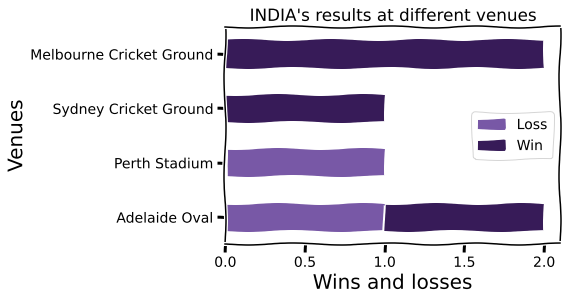

In [16]:
plt.xkcd()
plt.figure(figsize=(35,6))
ind_venue_wise1.plot(kind='barh' , stacked=True, color=['#7858A6','#371B58'])
plt.title("INDIA's results at different venues")
plt.legend(loc=7)
plt.xlabel('Wins and losses', fontsize=20)
plt.ylabel('Venues', fontsize=20)

# plt.savefig('Venue-wise results', bbox_inches='tight')
plt.show()

We can make an important observations from the plot:

INDIA has won all the games they played inMelbourne Cricket Ground and Sydney Cricket Ground.

Similarly, we do the same to analyse the toss results of INDIA:

First, we apply a lambda function on the 'Toss' column to know if INDIA has won or lost the toss. Then we rename the column 'WinningTeam' to 'Result'.

In [17]:
IND_results['Toss'] = IND_results['toss_won'].apply(lambda x: 'Won the toss' if x=='India' else 'Lost the toss')
IND_results.rename(columns={'WinningTeam':'Result'}, inplace=True)
IND_results.drop('toss_won', axis=1)
IND_results

,index,season,id,name,short_name,toss_won,decision,1st_inning_score,2nd_inning_score,home_score,...,highlights,home_key_batsman,home_key_bowler,home_playx1,away_playx1,away_key_batsman,away_key_bowler,Vs,Result,Toss
0,1,2022.0,1298178,England v India,ENG v INDIA,England,BOWL FIRST,168/6,170/0,170/0,...,Alex Hales and Jos Buttler carry England into ...,"Alex Hales,Jos Buttler","Chris Jordan,Adil Rashid","Jos Buttler (WK),Alex Hales (UKN),Phil Salt (U...","KL Rahul (UKN),Rohit Sharma (UKN),Virat Kohli ...","Hardik Pandya,Virat Kohli","Hardik Pandya,Bhuvneshwar Kumar",ENG,Loss,Lost the toss
1,3,2022.0,1298176,India v Zimbabwe,INDIA v ZIM,India,BAT FIRST,186/5,115,186/5,...,Suryakumar leads India's charge to top of Grou...,"Suryakumar Yadav,KL Rahul","Ravichandran Ashwin,Mohammed Shami","KL Rahul (UKN),Rohit Sharma (UKN),Virat Kohli ...","Wessly Madhevere (AR),Craig Ervine (UKN),Regis...","Ryan Burl,Sikandar Raza","Sean Williams,Sikandar Raza",ZIM,Win,Won the toss
2,10,2022.0,1298169,Bangladesh v India,BAN v INDIA,Bangladesh,BOWL FIRST,184/6,145/6,145/6,...,India survive Litton Das scare in wet Adelaide...,"Litton Das,Nurul Hasan","Hasan Mahmud,Shakib Al Hasan","Najmul Hossain Shanto (UKN),Litton Das (UKN),S...","KL Rahul (UKN),Rohit Sharma (UKN),Virat Kohli ...","Virat Kohli,KL Rahul","Hardik Pandya,Arshdeep Singh",BAN,Win,Lost the toss
3,15,2022.0,1298164,India v South Africa,INDIA v SA,India,BAT FIRST,133/9,137/5,133/9,...,"Ngidi, Parnell, Markram, Miller lead South Afr...","Suryakumar Yadav,Rohit Sharma","Arshdeep Singh,Mohammed Shami","KL Rahul (UKN),Rohit Sharma (UKN),Virat Kohli ...","Quinton de Kock (WK),Temba Bavuma (UKN),Rilee ...","David Miller,Aiden Markram","Lungi Ngidi,Wayne Parnell",SA,Loss,Won the toss
4,22,2022.0,1298157,India v Netherlands,INDIA v NED,India,BAT FIRST,179/2,123/9,179/2,...,"Rohit, Kohli and Suryakumar power India to the...","Virat Kohli,Rohit Sharma","Bhuvneshwar Kumar,Axar Patel","KL Rahul (UKN),Rohit Sharma (UKN),Virat Kohli ...","Vikramjit Singh (UKN),Max O'Dowd (UKN),Bas de ...","Tim Pringle,Colin Ackermann","Paul van Meekeren,Fred Klaassen",NED,Win,Won the toss
5,29,2022.0,1298150,India v Pakistan,INDIA v PAK,India,BOWL FIRST,159/8,160/6,160/6,...,Virat Kohli owns the MCG in thrilling finish a...,"Virat Kohli,Hardik Pandya","Hardik Pandya,Arshdeep Singh","KL Rahul (UKN),Rohit Sharma (UKN),Virat Kohli ...","Mohammad Rizwan (WK),Babar Azam (UKN),Shan Mas...","Shan Masood,Iftikhar Ahmed","Haris Rauf,Mohammad Nawaz",PAK,Win,Won the toss


To see whether RCB batted or bowled in the first innings, we perform the following:

In [18]:
IND_results['First Innings'] = np.where(IND_results['toss_won']=='India',IND_results['decision'],''+IND_results['decision'])
IND_results['First Innings'] = IND_results['First Innings'].str.replace('BAT FIRST','bat')
IND_results['First Innings'] = IND_results['First Innings'].str.replace('BOWL FIRST','field')
IND_results.drop('toss_won', axis=1, inplace=True)
IND_results.drop('decision', axis=1, inplace=True)
IND_results

,index,season,id,name,short_name,1st_inning_score,2nd_inning_score,home_score,away_score,winner,...,home_key_batsman,home_key_bowler,home_playx1,away_playx1,away_key_batsman,away_key_bowler,Vs,Result,Toss,First Innings
0,1,2022.0,1298178,England v India,ENG v INDIA,168/6,170/0,170/0,168/6,ENG,...,"Alex Hales,Jos Buttler","Chris Jordan,Adil Rashid","Jos Buttler (WK),Alex Hales (UKN),Phil Salt (U...","KL Rahul (UKN),Rohit Sharma (UKN),Virat Kohli ...","Hardik Pandya,Virat Kohli","Hardik Pandya,Bhuvneshwar Kumar",ENG,Loss,Lost the toss,field
1,3,2022.0,1298176,India v Zimbabwe,INDIA v ZIM,186/5,115,186/5,115,INDIA,...,"Suryakumar Yadav,KL Rahul","Ravichandran Ashwin,Mohammed Shami","KL Rahul (UKN),Rohit Sharma (UKN),Virat Kohli ...","Wessly Madhevere (AR),Craig Ervine (UKN),Regis...","Ryan Burl,Sikandar Raza","Sean Williams,Sikandar Raza",ZIM,Win,Won the toss,bat
2,10,2022.0,1298169,Bangladesh v India,BAN v INDIA,184/6,145/6,145/6,184/6,INDIA,...,"Litton Das,Nurul Hasan","Hasan Mahmud,Shakib Al Hasan","Najmul Hossain Shanto (UKN),Litton Das (UKN),S...","KL Rahul (UKN),Rohit Sharma (UKN),Virat Kohli ...","Virat Kohli,KL Rahul","Hardik Pandya,Arshdeep Singh",BAN,Win,Lost the toss,field
3,15,2022.0,1298164,India v South Africa,INDIA v SA,133/9,137/5,133/9,137/5,SA,...,"Suryakumar Yadav,Rohit Sharma","Arshdeep Singh,Mohammed Shami","KL Rahul (UKN),Rohit Sharma (UKN),Virat Kohli ...","Quinton de Kock (WK),Temba Bavuma (UKN),Rilee ...","David Miller,Aiden Markram","Lungi Ngidi,Wayne Parnell",SA,Loss,Won the toss,bat
4,22,2022.0,1298157,India v Netherlands,INDIA v NED,179/2,123/9,179/2,123/9,INDIA,...,"Virat Kohli,Rohit Sharma","Bhuvneshwar Kumar,Axar Patel","KL Rahul (UKN),Rohit Sharma (UKN),Virat Kohli ...","Vikramjit Singh (UKN),Max O'Dowd (UKN),Bas de ...","Tim Pringle,Colin Ackermann","Paul van Meekeren,Fred Klaassen",NED,Win,Won the toss,bat
5,29,2022.0,1298150,India v Pakistan,INDIA v PAK,159/8,160/6,160/6,159/8,INDIA,...,"Virat Kohli,Hardik Pandya","Hardik Pandya,Arshdeep Singh","KL Rahul (UKN),Rohit Sharma (UKN),Virat Kohli ...","Mohammad Rizwan (WK),Babar Azam (UKN),Shan Mas...","Shan Masood,Iftikhar Ahmed","Haris Rauf,Mohammad Nawaz",PAK,Win,Won the toss,field


We finally arrive at the results to see how many tosses RCB has won and lost, and how many among those did they go on to win/lose the game.

First, let's plot a bar graph to see how many times did RCB bat/field first after winning/losing the toss.

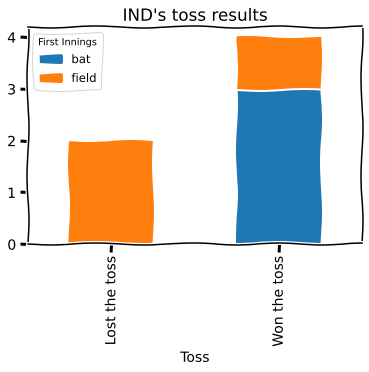

In [19]:
pd.crosstab(IND_results['Toss'], IND_results['First Innings']).plot(kind='bar', stacked=True)
plt.title("IND's toss results")
plt.legend(fontsize='small',title_fontsize='x-small', title='First Innings')
# plt.savefig('Toss Results.png', bbox_inches='tight')
plt.show()

In [20]:
toss_stats = IND_results[['Result','Toss','First Innings']].groupby(['Toss','Result']).count()
toss_stats

First Innings
Toss          Result               
Lost the toss Loss                1
              Win                 1
Won the toss  Loss                1
              Win                 3

We next check if winning the toss had any implications on INDIA's results.

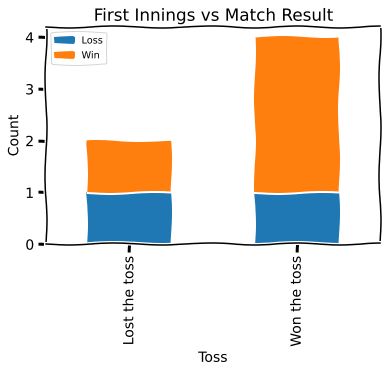

In [21]:
pd.crosstab(IND_results['Toss'],IND_results['Result']).plot(kind='bar',stacked=True)
plt.title('First Innings vs Match Result')
plt.legend(fontsize='x-small')
plt.ylabel('Count')
plt.show()

it seems that winning toss increases winning probability

it should be interesting to see how INDIA's top run getters have fared through the season. It'll give us a perspective on who was more consistent than the rest.

Let's first find out who are the top 5 run getters for INDIA and store it in a dataframe.

In [22]:
top_runs = details[['batsman1_name','runs']].loc[details['current_innings']=='INDIA'].groupby('batsman1_name').sum().sort_values(by='runs',ascending=False)[0:5]
top_run_getters = top_runs.index
top_run_getters

Index(['Virat Kohli', 'Suryakumar Yadav', 'Hardik Pandya', 'KL Rahul',
       'Rohit Sharma'],
      dtype='object', name='batsman1_name')

But our aim is to see how these batters have fared in every match they've played in. So, we'll find their cumulative sum:

In [23]:
top5_ind = details[['match_name','batsman1_name','batsman1_runs']].loc[(details['current_innings']=='INDIA') & (details['batsman1_name'].isin(top_run_getters))].groupby(['match_name','batsman1_name']).max().sort_index().unstack()
top5_ind = top5_ind.cumsum()
top5_ind

batsman1_runs                                                   
batsman1_name Hardik Pandya KL Rahul Rohit Sharma Suryakumar Yadav Virat Kohli
match_name                                                                    
BAN v INDIA             5.0     50.0          2.0             30.0        64.0
ENG v INDIA            68.0     55.0         29.0             44.0       114.0
INDIA v NED             NaN     64.0         82.0             95.0       176.0
INDIA v PAK           108.0     68.0         86.0            110.0       258.0
INDIA v SA            110.0     77.0        101.0            178.0       270.0
INDIA v ZIM           128.0    128.0        116.0            233.0       296.0

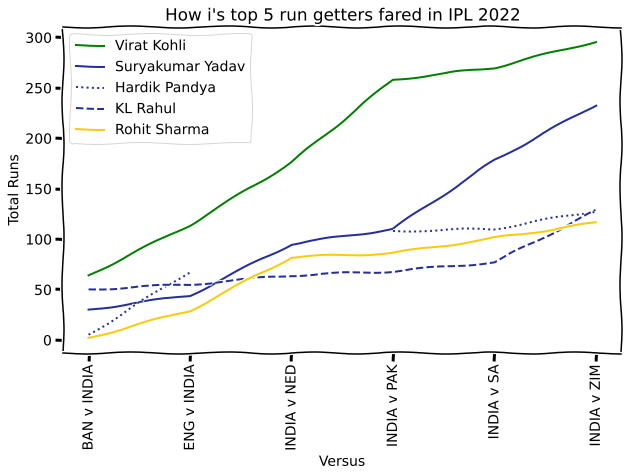

In [24]:
plt.figure(figsize=(10,6))
plt.plot(top5_ind[('batsman1_runs','Virat Kohli')], label='Virat Kohli', color='Green', linewidth=2)
plt.plot(top5_ind[('batsman1_runs','Suryakumar Yadav')], label='Suryakumar Yadav', color='#242F9B', linewidth=2)
plt.plot(top5_ind[('batsman1_runs','Hardik Pandya')], label='Hardik Pandya', color='#242F9B', linewidth=2, linestyle=':')
plt.plot(top5_ind[('batsman1_runs','KL Rahul')], label='KL Rahul', color='#242F9B', linewidth=2, linestyle='--')
plt.plot(top5_ind[('batsman1_runs','Rohit Sharma')], label='Rohit Sharma', color='#FBCB0A', linewidth=2)

plt.title("How i's top 5 run getters fared in IPL 2022")
plt.xticks(rotation=90)
plt.xlabel('Versus')
plt.ylabel('Total Runs')
plt.legend()
plt.grid()
# plt.savefig('RCB top scorers', bbox_inches='tight')
plt.show()

So satisfying to see! Virat has been incredibly consistent with his batting. Suryakumar Yadav has been amazing too with his finishing. 

Let's now do the same to see RCB's bowlers performance.

In [25]:
ind_match_id=IND_results['id']

ind_match_id

0    1298178
1    1298176
2    1298169
3    1298164
4    1298157
5    1298150
Name: id, dtype: int64

List of all bowlers who bowled more than one ball

In [26]:
ind_details = details.loc[details['match_id'].isin(ind_match_id)]
ind_bowling = ind_details.loc[(ind_details['current_innings']!='INDIA') & (ind_details['wkt_text']!="")]

ind_top_bowlers = ind_bowling['bowler1_name'].value_counts()[:].index
ind_top_bowlers

Index(['Arshdeep Singh', 'Mohammed Shami', 'Ravichandran Ashwin',
       'Bhuvneshwar Kumar', 'Hardik Pandya', 'Axar Patel'],
      dtype='object')

In [27]:
ind_bowling

,comment_id,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,runs,...,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText
366,220,1298178,ENG v INDIA,INDIA,ENG,ENG,2,1,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"width, and <B>Buttler leans on a flat drive pa...","<p>Pant has called for a helmet, and comes up ...",NaN
367,210,1298178,ENG v INDIA,INDIA,ENG,ENG,2,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"shape outside the off stump, swinging away, an...",<p><B>8.15pm</B> Welcome back. What a humdinge...,NaN
368,230,1298178,ENG v INDIA,INDIA,ENG,ENG,2,1,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"there's the inducker, tight to the stumps and ...",NaN,NaN
369,240,1298178,ENG v INDIA,INDIA,ENG,ENG,2,1,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,False,too much width again and <B>Buttler laces anot...,NaN,"<p>Jamie Dow: ""Great contest! England have giv..."
370,250,1298178,ENG v INDIA,INDIA,ENG,ENG,2,1,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"another outswinger, but starts wider and swing...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6106,119010,1298150,INDIA v PAK,PAK,INDIA,PAK,1,20,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"looks to slant it into a wide line, away from ...",<p>It'll be Bhuvi to finish. Pakistan will eye...,NaN
6107,119030,1298150,INDIA v PAK,PAK,INDIA,PAK,1,20,2,0,...,1072470.0,Shaheen Shah Afridi,Bhuvneshwar Kumar,16.0,8.0,Shaheen Shah Afridi c &amp; b Kumar 16 (17m 8b...,False,"Eight down. Shortish on leg stump, and the bal...",<p>Play is held up as a streaker runs onto the...,NaN
6108,119040,1298150,INDIA v PAK,PAK,INDIA,PAK,1,20,3,6,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"wow, that's certainly the shot of a local lad....",<p>Haris Rauf is in at No. 10. He's something ...,NaN
6109,119050,1298150,INDIA v PAK,PAK,INDIA,PAK,1,20,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,back of a length slower ball in the corridor. ...,NaN,NaN


In [28]:
ind_bowling = ind_bowling.loc[ind_bowling['bowler1_name'].isin(ind_top_bowlers)]
ind_bowling = ind_bowling[['match_id','bowler1_name','bowler1_wkts']].groupby(['match_id','bowler1_name']).max().unstack()
ind_bowling=ind_bowling.cumsum()
ind_bowling

bowler1_wkts                                             \
bowler1_name Arshdeep Singh Axar Patel Bhuvneshwar Kumar Hardik Pandya   
match_id                                                                 
1298150                 3.0        0.0               1.0           3.0   
1298157                 5.0        2.0               3.0           3.0   
1298164                 7.0        NaN               3.0           4.0   
1298169                 9.0        2.0               3.0           6.0   
1298176                10.0        3.0               4.0           8.0   
1298178                10.0        3.0               4.0           8.0   

                                                 
bowler1_name Mohammed Shami Ravichandran Ashwin  
match_id                                         
1298150                 1.0                 0.0  
1298157                 2.0                 2.0  
1298164                 3.0                 3.0  
1298169                 4.0                 3.0  
1298176                 6.0                 6.0  
1298178                 6.0                 6.0

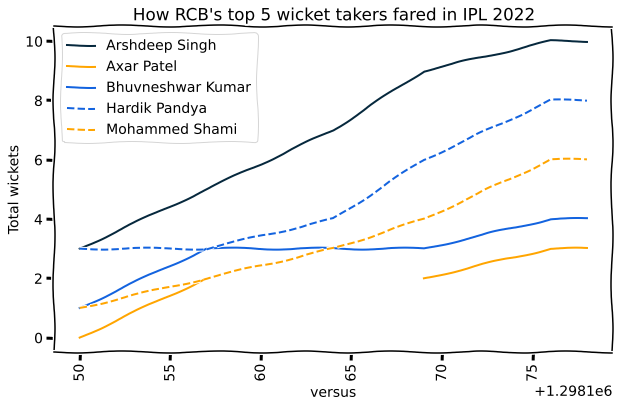

In [29]:
plt.figure(figsize=(10,6))
# plt.style.use('seaborn')
plt.plot(ind_bowling['bowler1_wkts','Arshdeep Singh'],color='#06283D',linewidth=2, label='Arshdeep Singh')
plt.plot(ind_bowling['bowler1_wkts','Axar Patel'],color='#FFA500',linewidth=2, label='Axar Patel')
plt.plot(ind_bowling['bowler1_wkts','Bhuvneshwar Kumar'],color='#1363DF',linewidth=2, label='Bhuvneshwar Kumar')
plt.plot(ind_bowling['bowler1_wkts','Hardik Pandya'],color='#1363DF',linewidth=2, linestyle='--', label='Hardik Pandya')
plt.plot(ind_bowling['bowler1_wkts','Mohammed Shami'],color='#FFA500',linestyle='--',linewidth=2, label='Mohammed Shami')
plt.xlabel('versus')
plt.ylabel('Total wickets')
plt.xticks(rotation=90)
plt.title("How RCB's top 5 wicket takers fared in IPL 2022")
plt.legend()
plt.grid(True)
# plt.savefig('top wicket takers.png',bbox_inches='tight')
plt.show()

Arshdeep Singh stands out by a mile! He's been INDIA's best bowling asset this season. Hardik Pandya had a decent run in this season too.

I want to find out if any of INDIA's batsman's scoring has any correlation with INDIA's results. For example, maybe 70% of the times that Dinesh Karthik has scored more than 20 runs, INDIA ended up winning the match. Let's find out if this is true!

We'll create a dataframe that contains the number of runs scored by all the INDIA players in all the games and also the result of the game. Let's call it batter_result_corr

In [30]:
ind_details

,comment_id,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,runs,...,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText
243,110,1298178,ENG v INDIA,INDIA,ENG,INDIA,1,1,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"short and wide, and <B>hacked through backward...",<p><B>6.30pm</B> That'll do. Play!</p><p><B>6....,NaN
244,120,1298178,ENG v INDIA,INDIA,ENG,INDIA,1,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"tighter line, comes onto the bat nicely as Rah...",NaN,NaN
245,130,1298178,ENG v INDIA,INDIA,ENG,INDIA,1,1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"better from Stokes, genuine swing on a good le...",NaN,NaN
246,140,1298178,ENG v INDIA,INDIA,ENG,INDIA,1,1,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"full again, hint of outswing as Sharma leans i...",NaN,NaN
247,150,1298178,ENG v INDIA,INDIA,ENG,INDIA,1,1,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,nip and shape back into the right-hander this ...,NaN,"<p>Lee: ""Boundary off the first ball of each t..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,219050,1298150,INDIA v PAK,PAK,INDIA,INDIA,2,20,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,now he bowls a wide! All the pressure is on th...,"<p>Suddenly, India need 6 off 3. Such a massiv...",NaN
6232,219040,1298150,INDIA v PAK,PAK,INDIA,INDIA,2,20,4,7,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"full-toss, full-toss, and it's gone for six!!!...",NaN,<p>Babar's having a heated discussion with the...
6233,219070,1298150,INDIA v PAK,PAK,INDIA,INDIA,2,20,5,0,...,30045.0,Dinesh Karthik,Mohammad Nawaz,1.0,2.0,KD Karthik st &dagger;Mohammad Rizwan b Mohamm...,False,"got him, a stumping off the pads!!! Goes flat,...","<p>Phew. It's down to two off two now, with DK...",NaN
6234,219090,1298150,INDIA v PAK,PAK,INDIA,INDIA,2,20,6,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,and Ashwin clears one of those infielders!!! W...,<p>Seven fielders in the circle now.</p>,<p><b>11.12pm</b> And that concludes our live ...


In [31]:
ind_details.set_index('match_id',inplace=True)


In [32]:
# IND_results.set_index('id',inplace=True)

In [33]:
IND_results.rename(columns = {'id':'match_id'}, inplace = True)
IND_results.head(1)

,index,season,match_id,name,short_name,1st_inning_score,2nd_inning_score,home_score,away_score,winner,...,home_key_batsman,home_key_bowler,home_playx1,away_playx1,away_key_batsman,away_key_bowler,Vs,Result,Toss,First Innings
0,1,2022.0,1298178,England v India,ENG v INDIA,168/6,170/0,170/0,168/6,ENG,...,"Alex Hales,Jos Buttler","Chris Jordan,Adil Rashid","Jos Buttler (WK),Alex Hales (UKN),Phil Salt (U...","KL Rahul (UKN),Rohit Sharma (UKN),Virat Kohli ...","Hardik Pandya,Virat Kohli","Hardik Pandya,Bhuvneshwar Kumar",ENG,Loss,Lost the toss,field


In [34]:
# ind_details.set_index('comment_id'inplace=True)
ind_details.head(1)

,comment_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,runs,shortText,...,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText
match_id,,,,,,,,,,,,,,,,,,,,,
1298178,110,ENG v INDIA,INDIA,ENG,INDIA,1,1,1,4,"Stokes to Rahul, FOUR",...,NaN,NaN,NaN,NaN,NaN,NaN,False,"short and wide, and <B>hacked through backward...",<p><B>6.30pm</B> That'll do. Play!</p><p><B>6....,NaN


In [35]:
# ind_details.set_index('match_id',inplace=True)
batter_result_corr = pd.merge(ind_details,IND_results[['match_id','Result']], on='match_id', how='inner')
batter_result_corr = batter_result_corr.loc[batter_result_corr['current_innings']=='INDIA']
ind_batters = batter_result_corr['batsman1_name'].unique()
ind_batters

array(['KL Rahul', 'Rohit Sharma', 'Virat Kohli', 'Suryakumar Yadav',
       'Hardik Pandya', 'Rishabh Pant', 'Dinesh Karthik', 'Axar Patel',
       'Ravichandran Ashwin', 'Deepak Hooda', 'Bhuvneshwar Kumar',
       'Mohammed Shami', 'Arshdeep Singh'], dtype=object)

In [36]:
batter_result_corr.columns

Index(['match_id', 'comment_id', 'match_name', 'home_team', 'away_team',
       'current_innings', 'innings_id', 'over', 'ball', 'runs', 'shortText',
       'isBoundary', 'isWide', 'isNoball', 'batsman1_id', 'batsman1_name',
       'batsman1_runs', 'batsman1_balls', 'bowler1_id', 'bowler1_name',
       'bowler1_overs', 'bowler1_maidens', 'bowler1_runs', 'bowler1_wkts',
       'batsman2_id', 'batsman2_name', 'batsman2_runs', 'batsman2_balls',
       'bowler2_id', 'bowler2_name', 'bowler2_overs', 'bowler2_maidens',
       'bowler2_runs', 'bowler2_wkts', 'wicket_id', 'wkt_batsman_name',
       'wkt_bowler_name', 'wkt_batsman_runs', 'wkt_batsman_balls', 'wkt_text',
       'isRetiredHurt', 'text', 'preText', 'postText', 'Result'],
      dtype='object')

In [37]:
batter_result_corr = batter_result_corr[['match_id','batsman1_name','innings_id','runs','Result']].groupby(['batsman1_name','innings_id','Result','match_id']).sum().unstack(level=0)


In [38]:
batter_result_corr

runs                               \
batsman1_name              Arshdeep Singh Axar Patel Bhuvneshwar Kumar   
innings_id Result match_id                                               
1          Loss   1298164             2.0        NaN               5.0   
                  1298178             NaN        NaN               NaN   
           Win    1298157             NaN        NaN               NaN   
                  1298169             NaN        7.0               NaN   
                  1298176             NaN        NaN               NaN   
2          Win    1298150             NaN        3.0               NaN   

                                                                               \
batsman1_name              Deepak Hooda Dinesh Karthik Hardik Pandya KL Rahul   
innings_id Result match_id                                                      
1          Loss   1298164           0.0            8.0           2.0      9.0   
                  1298178           NaN            NaN          65.0      5.0   
           Win    1298157           NaN            NaN           NaN     10.0   
                  1298169           NaN            8.0           5.0     53.0   
                  1298176           NaN            NaN          25.0     51.0   
2          Win    1298150           NaN            1.0          43.0      4.0   

                                                                            \
batsman1_name              Mohammed Shami Ravichandran Ashwin Rishabh Pant   
innings_id Result match_id                                                   
1          Loss   1298164             0.0                 8.0          NaN   
                  1298178             NaN                 NaN          6.0   
           Win    1298157             NaN                 NaN          NaN   
                  1298169             NaN                13.0          NaN   
                  1298176             NaN                 NaN          4.0   
2          Win    1298150             NaN                 2.0          NaN   

                                                                      
batsman1_name              Rohit Sharma Suryakumar Yadav Virat Kohli  
innings_id Result match_id                                            
1          Loss   1298164          15.0             68.0        16.0  
                  1298178          27.0             14.0        51.0  
           Win    1298157          55.0             51.0        63.0  
                  1298169           2.0             30.0        66.0  
                  1298176          16.0             58.0        26.0  
2          Win    1298150           4.0             15.0        88.0

In [39]:
batter_result_corr.reset_index(level=0, inplace=True)


In [40]:
batter_result_corr.reset_index(level=0, inplace=True)


In [41]:
batter_result_corr

Result innings_id           runs                               \
batsman1_name                   Arshdeep Singh Axar Patel Bhuvneshwar Kumar   
match_id                                                                      
1298164         Loss          1            2.0        NaN               5.0   
1298178         Loss          1            NaN        NaN               NaN   
1298157          Win          1            NaN        NaN               NaN   
1298169          Win          1            NaN        7.0               NaN   
1298176          Win          1            NaN        NaN               NaN   
1298150          Win          2            NaN        3.0               NaN   

                                                                  \
batsman1_name Deepak Hooda Dinesh Karthik Hardik Pandya KL Rahul   
match_id                                                           
1298164                0.0            8.0           2.0      9.0   
1298178                NaN            NaN          65.0      5.0   
1298157                NaN            NaN           NaN     10.0   
1298169                NaN            8.0           5.0     53.0   
1298176                NaN            NaN          25.0     51.0   
1298150                NaN            1.0          43.0      4.0   

                                                                            \
batsman1_name Mohammed Shami Ravichandran Ashwin Rishabh Pant Rohit Sharma   
match_id                                                                     
1298164                  0.0                 8.0          NaN         15.0   
1298178                  NaN                 NaN          6.0         27.0   
1298157                  NaN                 NaN          NaN         55.0   
1298169                  NaN                13.0          NaN          2.0   
1298176                  NaN                 NaN          4.0         16.0   
1298150                  NaN                 2.0          NaN          4.0   

                                            
batsman1_name Suryakumar Yadav Virat Kohli  
match_id                                    
1298164                   68.0        16.0  
1298178                   14.0        51.0  
1298157                   51.0        63.0  
1298169                   30.0        66.0  
1298176                   58.0        26.0  
1298150                   15.0        88.0

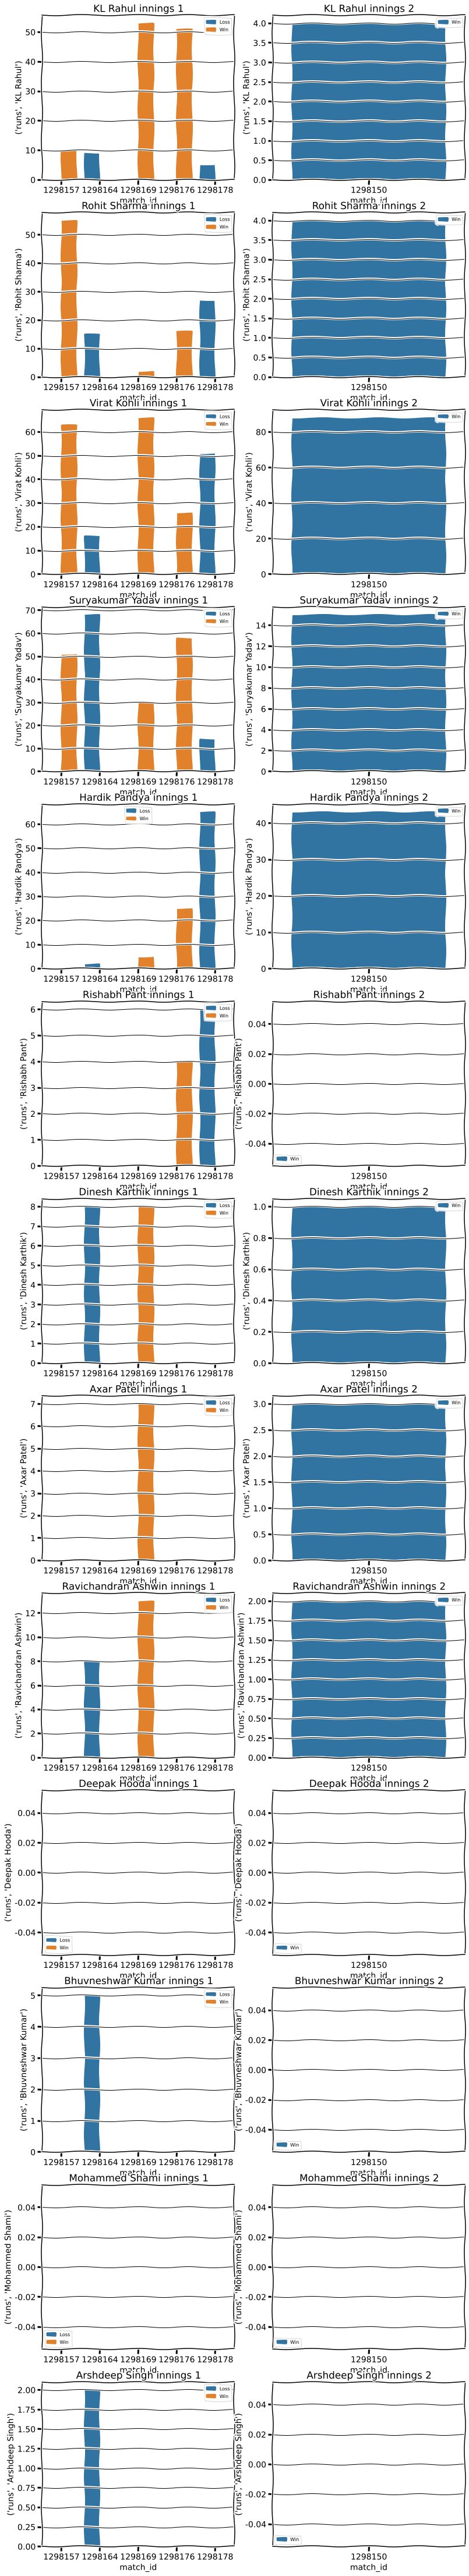

In [42]:
a=13
b=2
c=1
fig = plt.figure(figsize=(13,80))
for batter in ind_batters:
    plt.subplot(a,b,c)
    plt.grid(linewidth=1, color='k')
    sns.barplot(batter_result_corr.loc[batter_result_corr['innings_id']==1].index, batter_result_corr.loc[batter_result_corr['innings_id']==1]['runs',batter],hue=batter_result_corr.loc[batter_result_corr['innings_id']==1]['Result'])
               
    plt.title(batter+' innings 1')
    plt.legend(fontsize=('xx-small'))
    
    c+=1
    
    plt.subplot(a,b,c)
    plt.grid(linewidth=1, color='k')
    sns.barplot(batter_result_corr.loc[batter_result_corr['innings_id']==2].index, batter_result_corr.loc[batter_result_corr['innings_id']==2]['runs',batter],hue=batter_result_corr.loc[batter_result_corr['innings_id']==2]['Result'])
           
    plt.title(batter+ ' innings 2')
    plt.legend(fontsize=('xx-small'))
    
    c+=1